# 1. Perkenalan
- Nama : Andreean Dharma Arisandi

# 2. Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay, precision_score
from feature_engine.outliers import OutlierTrimmer, Winsorizer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# 3. Data Loading

In [2]:
data = pd.read_csv('Car_Insurance_Claim.csv')
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Load data dan menampilkan 5 data teratas

In [3]:
data.tail()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0
9999,442696,26-39,female,majority,0-9y,none,working class,0.435225,1.0,before 2015,1.0,1.0,10238,13000.0,sedan,0,0,0,0.0


Menampilkan 5 data terbawah

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

Dari Info diatas dataset memiliki 10000 baris dan 19 kolom, dan pada kolom CREDIT_SCORE dan ANNUAL_MILEAGE terdapat missing value

In [5]:
data.describe()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


Dari describe di atas bisa melihat mean, min, Q1, Q2 (Median), Q3 dan Max

In [6]:
data.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Terdapat Missing Value pada CREDIT_SCORE dan ANNUAL_MILEAGE

In [7]:
data["AGE"].replace({"16-25": "Young", "26-39": "Middle Age","40-64":"Old","65+":"Very Old"}, inplace=True)
data["DRIVING_EXPERIENCE"].replace({"0-9y": "Newbie", "10-19y": "Amateur","20-29y":"Advanced","30y+":"Expert"}, inplace=True)

Mengubah isi kolom age dan driving experience menjadi categorical

In [8]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,Very Old,female,majority,Newbie,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,Young,male,majority,Newbie,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,Young,female,majority,Newbie,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,Young,male,majority,Newbie,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,Middle Age,male,majority,Amateur,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


Kolom Age dan Driving Experience sudah berubah menjadi kategorikal

In [9]:
num_column = list(data.select_dtypes("number").drop(columns = ["OUTCOME"]).columns)
data[num_column].head()

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,569520,0.629027,1.0,0.0,1.0,10238,12000.0,0,0,0
1,750365,0.357757,0.0,0.0,0.0,10238,16000.0,0,0,0
2,199901,0.493146,1.0,0.0,0.0,10238,11000.0,0,0,0
3,478866,0.206013,1.0,0.0,1.0,32765,11000.0,0,0,0
4,731664,0.388366,1.0,0.0,0.0,32765,12000.0,2,0,1


Data Numerik

In [10]:
cat_column = list(data.select_dtypes(object).columns)
data[cat_column].head()

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
0,Very Old,female,majority,Newbie,high school,upper class,after 2015,sedan
1,Young,male,majority,Newbie,none,poverty,before 2015,sedan
2,Young,female,majority,Newbie,high school,working class,before 2015,sedan
3,Young,male,majority,Newbie,university,working class,before 2015,sedan
4,Middle Age,male,majority,Amateur,none,working class,before 2015,sedan


Data kategorikal

In [11]:
data['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

Label targetnya imbalanced Mild karna perbandinganya 68% untuk 0 dan 32% untuk 1

# 4. Exploratory Data Analysis

In [12]:
plt.style.use('fivethirtyeight')

Style Plot yang digunakan untuk EDA

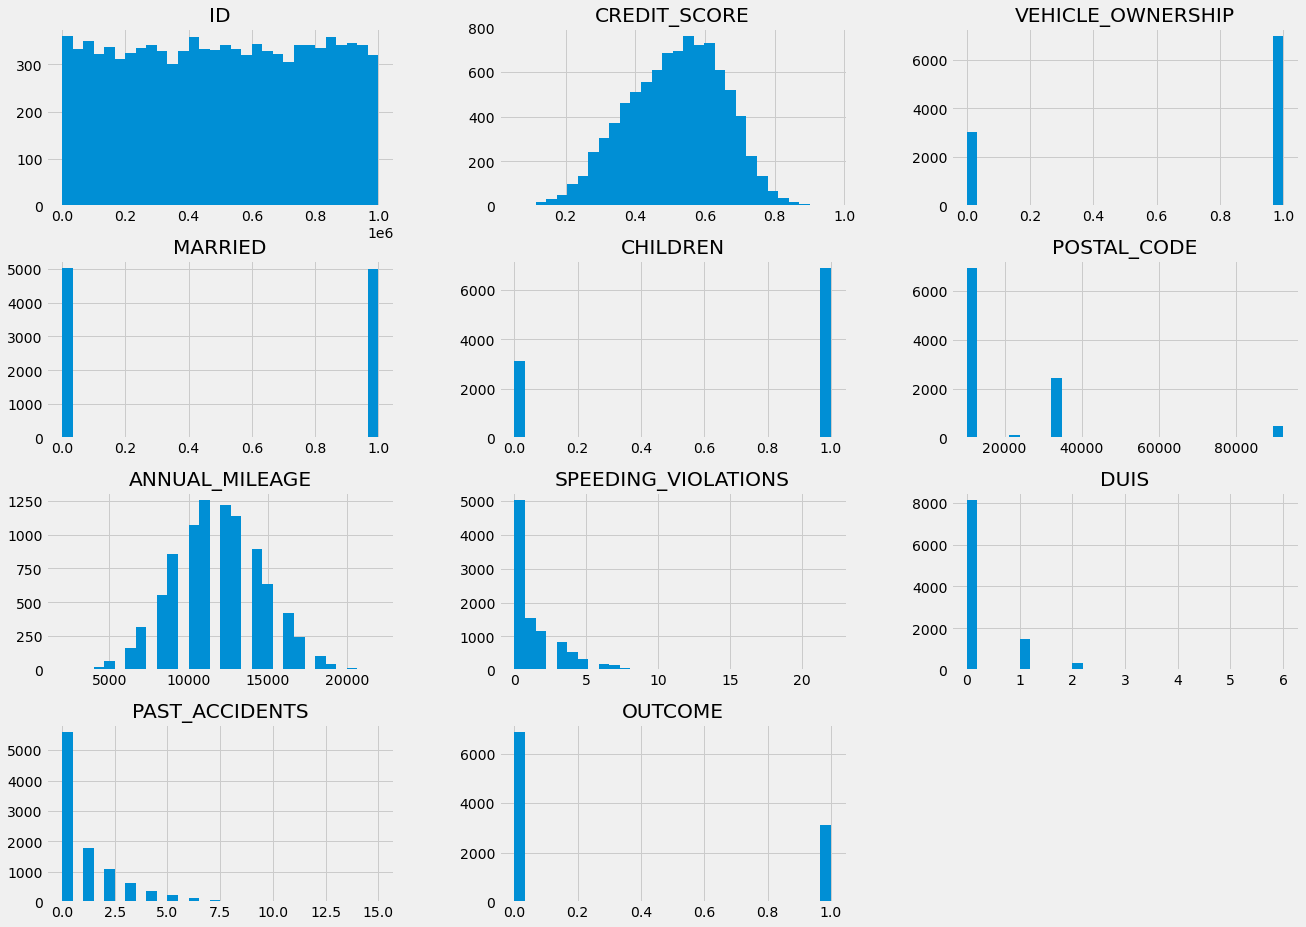

In [13]:
data.hist(bins=30, figsize=(20,15))

plt.show()

Histogram Plot distribusi data numerik

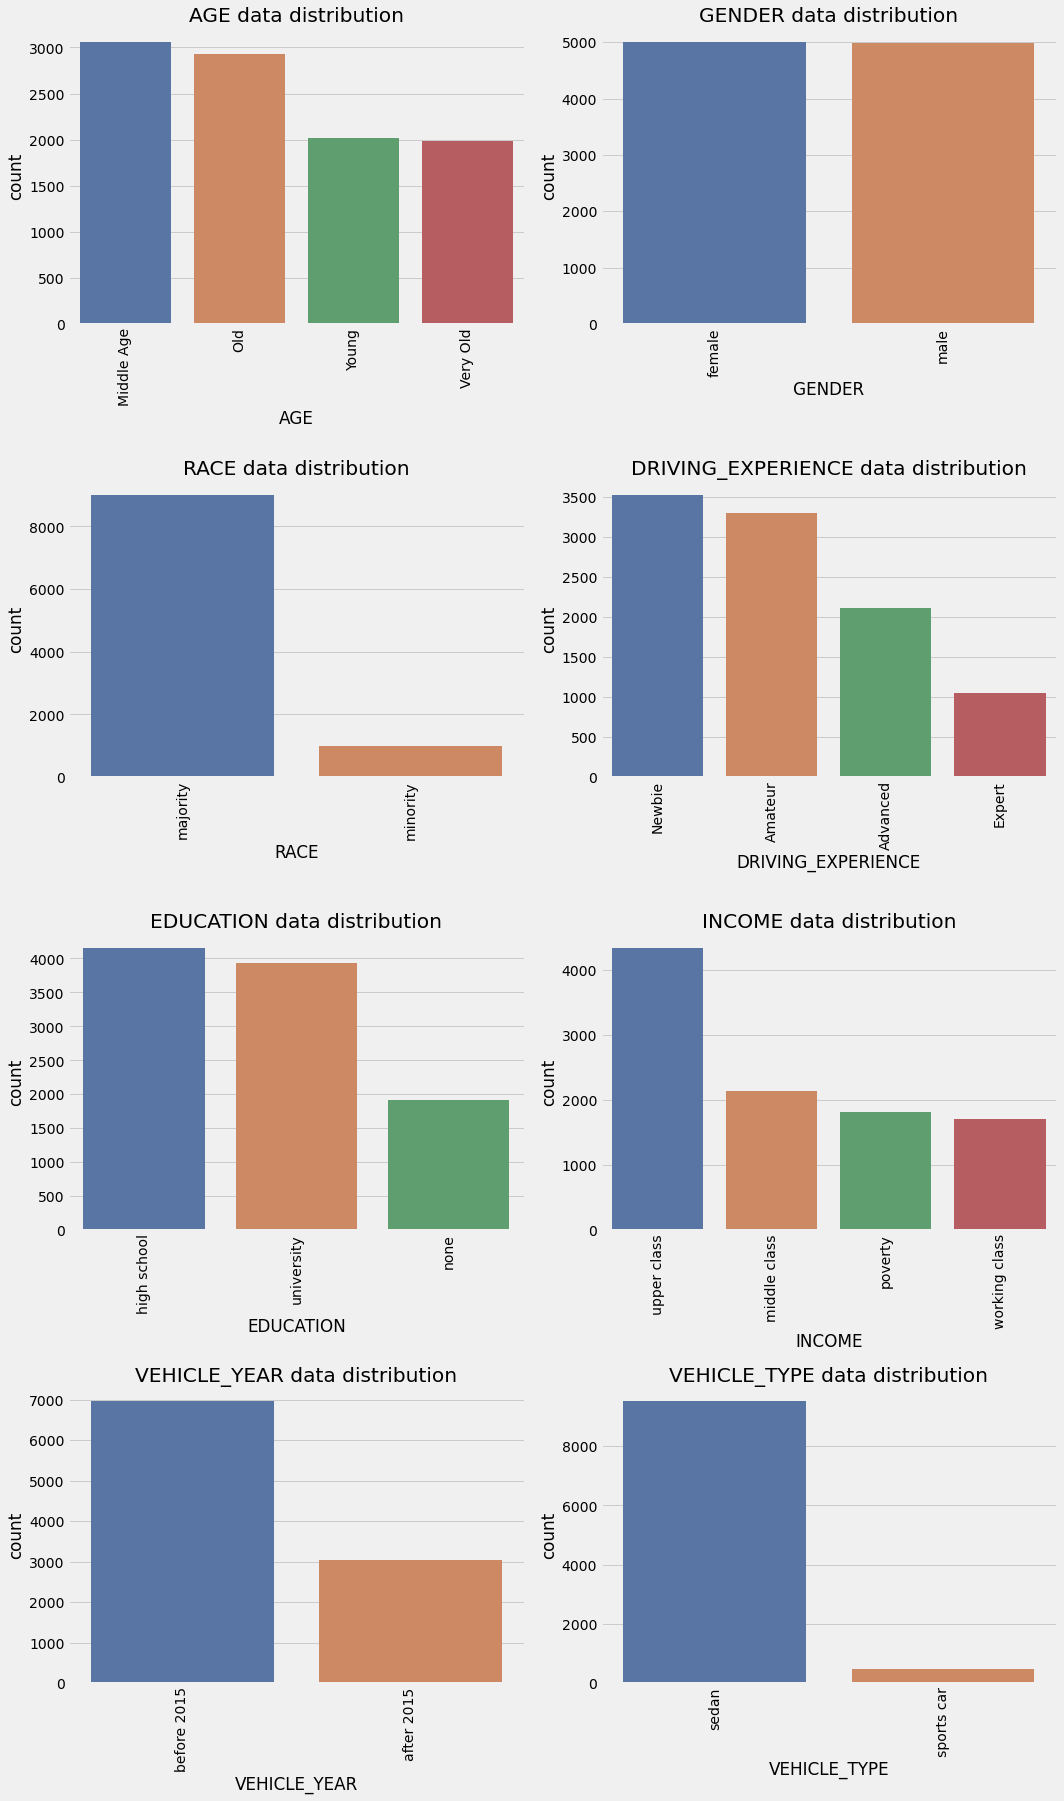

In [14]:
plt.figure(figsize = (15, 30))
for i in range(len(cat_column)):
    plt.subplot(len(cat_column)//2+1, 2, i + 1)
    sns.countplot(
        x = data[cat_column[i]],
        order = data[cat_column[i]].value_counts().sort_values(ascending = False).index,
        palette = "deep"
    )
    plt.title(str(cat_column[i]) + " data distribution", fontweight = 20)
    plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Barplot Semua data kategorikal

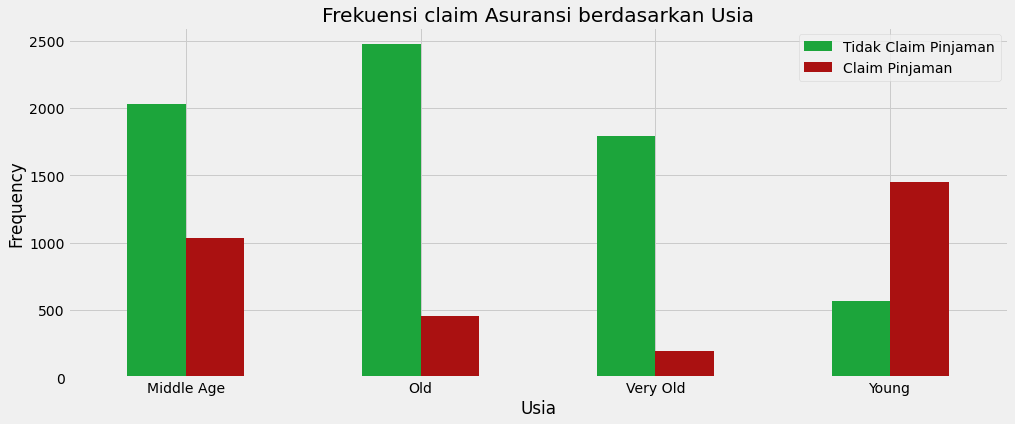

In [15]:
pd.crosstab(data.AGE,data.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi claim Asuransi berdasarkan Usia')
plt.xlabel('Usia')
plt.xticks(rotation=0)
plt.legend(["Tidak Claim Pinjaman", "Claim Pinjaman"])
plt.ylabel('Frequency')
plt.show()

Di sini Kaum Muda lebih cenderung mengklaim pinjaman dibandingkan umur lain

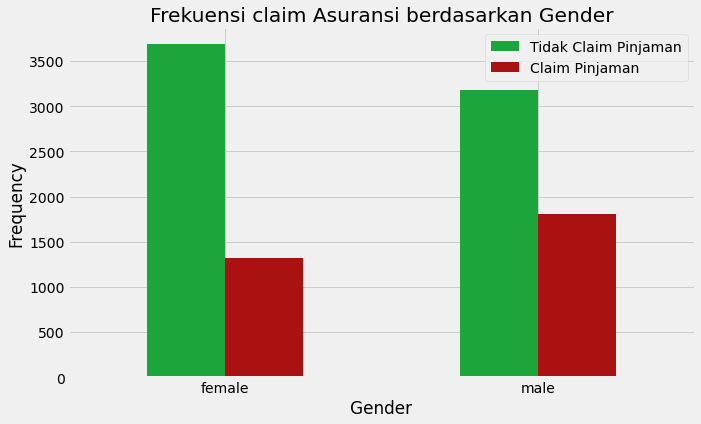

In [16]:
pd.crosstab(data.GENDER,data.OUTCOME).plot(kind="bar",figsize=(10,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi claim Asuransi berdasarkan Gender')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.legend(["Tidak Claim Pinjaman", "Claim Pinjaman"])
plt.ylabel('Frequency')
plt.show()

Untuk Gender laki-laki sedikit lebih banyak yang klaim pinjaman

In [17]:
data['RACE'].value_counts()

majority    9012
minority     988
Name: RACE, dtype: int64

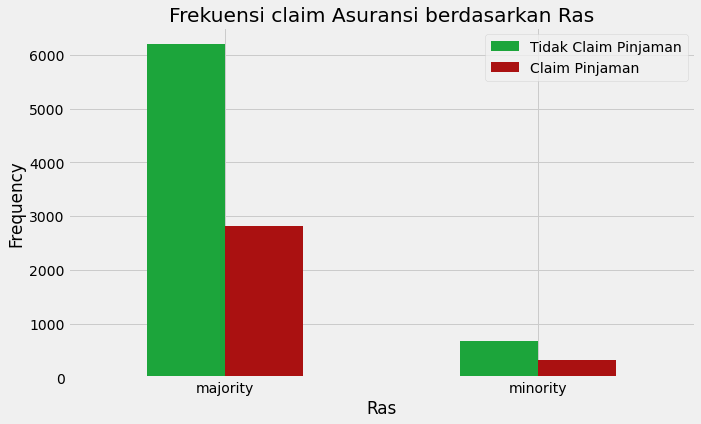

In [18]:
pd.crosstab(data.RACE,data.OUTCOME).plot(kind="bar",figsize=(10,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi claim Asuransi berdasarkan Ras')
plt.xlabel('Ras')
plt.xticks(rotation=0)
plt.legend(["Tidak Claim Pinjaman", "Claim Pinjaman"])
plt.ylabel('Frequency')
plt.show()

Dikarenakan data mayoritas lebih banyak dibanding minoritas jadi mayoritas lebih banyak klaim pinjama dan fitur RACE tidak memiliki korelasi yang baik terhadap target

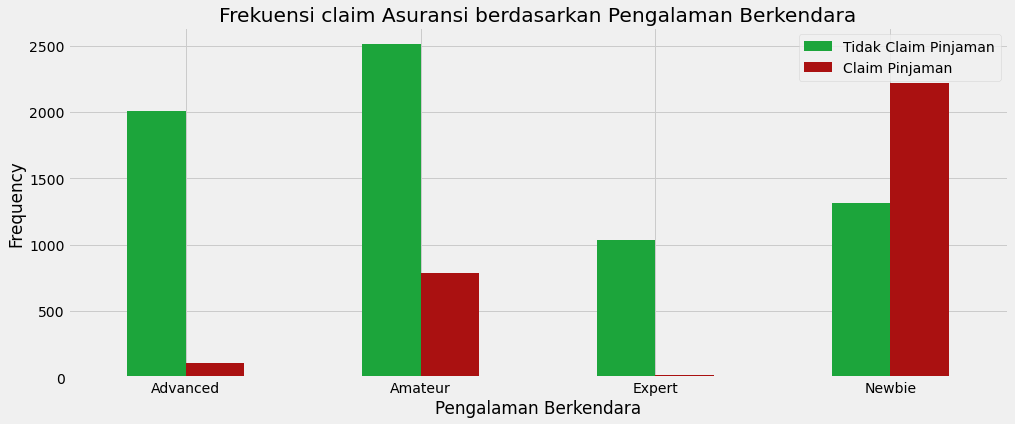

In [19]:
pd.crosstab(data.DRIVING_EXPERIENCE,data.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi claim Asuransi berdasarkan Pengalaman Berkendara')
plt.xlabel('Pengalaman Berkendara')
plt.xticks(rotation=0)
plt.legend(["Tidak Claim Pinjaman", "Claim Pinjaman"])
plt.ylabel('Frequency')
plt.show()

Untuk data pengalaman berkendara disini pemula paling banyak klaim pinjaman asuransi, ini bisa jadi disebabkan karena pemula banyak terjadi kecelakaan dalam berkendara yang membuat kendaraan mereka rusak sehingga mengklaim asuransi mereka

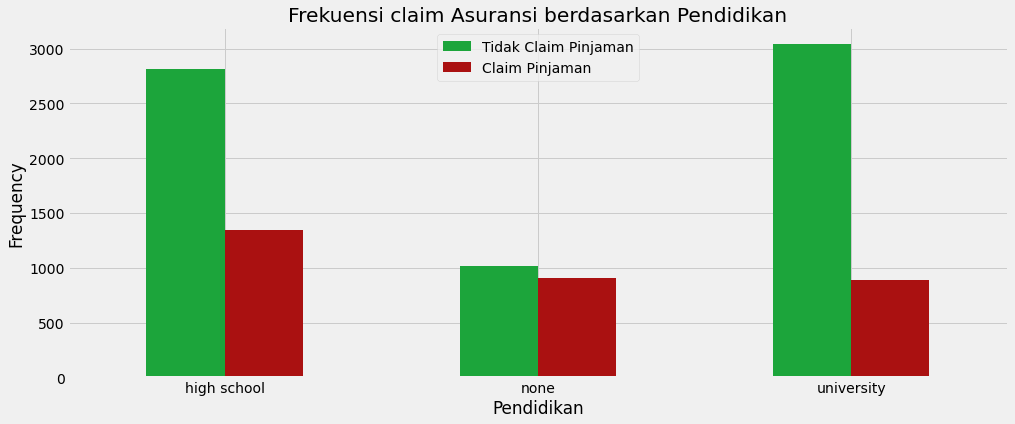

In [20]:
pd.crosstab(data.EDUCATION,data.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi claim Asuransi berdasarkan Pendidikan')
plt.xlabel('Pendidikan')
plt.xticks(rotation=0)
plt.legend(["Tidak Claim Pinjaman", "Claim Pinjaman"])
plt.ylabel('Frequency')
plt.show()

Berdasarkan Plot diatas lulusan SMA paling banyak claim asuransi sedangkan yang paling rendah adalah lulusan Univeristas

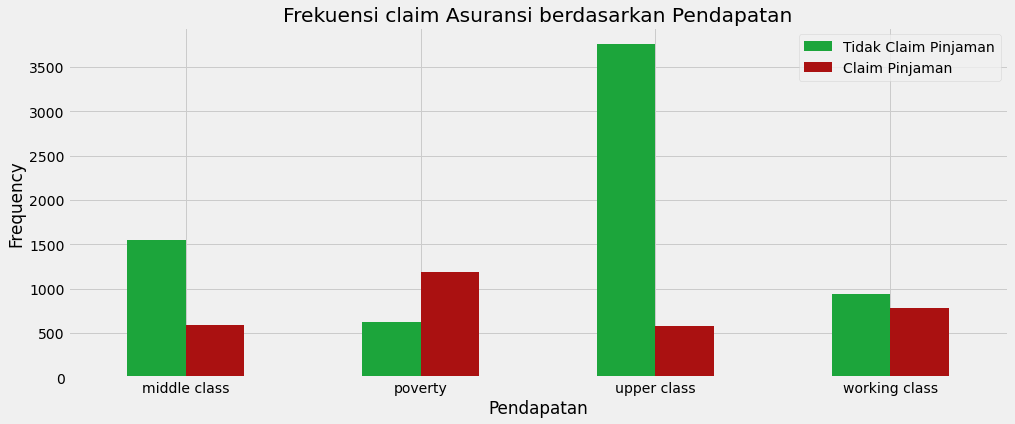

In [21]:
pd.crosstab(data.INCOME,data.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi claim Asuransi berdasarkan Pendapatan')
plt.xlabel('Pendapatan')
plt.xticks(rotation=0)
plt.legend(["Tidak Claim Pinjaman", "Claim Pinjaman"])
plt.ylabel('Frequency')
plt.show()

Berdasarkan plot diatas bahwa kelas Kemiskinan lebih mungkin untuk mengajukan pinjaman, sedangkan kelas yang lebih tinggi adalah yang paling kecil kemungkinannya untuk mengajukan pinjaman.

Text(0.5, 1.0, 'Histogram Pembelian Credit Score')

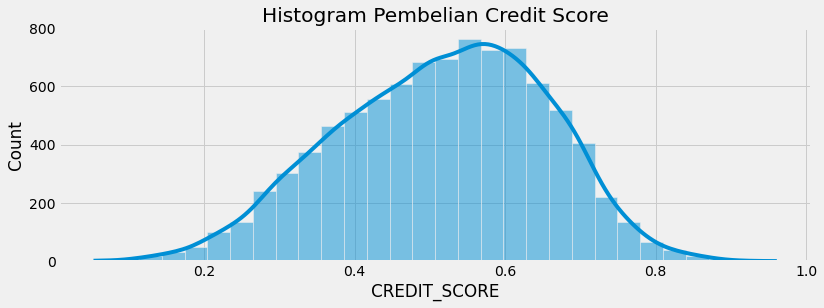

In [22]:
plt.figure(figsize=(12, 4))
sns.histplot(data['CREDIT_SCORE'], bins=30, kde=True)
plt.title('Histogram Pembelian Credit Score')

Credit score dari 0 sampai 1, yang paling banyak nasabah credit score nya 0.5 sampai 0.6

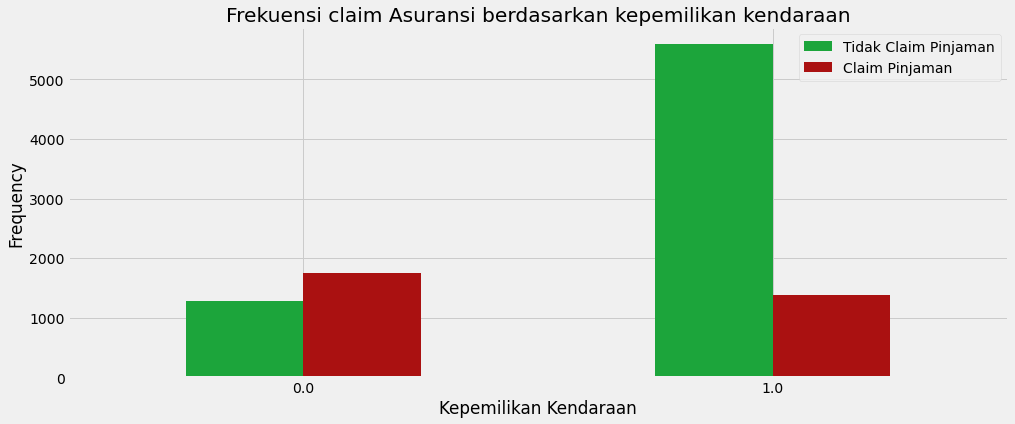

In [23]:
pd.crosstab(data.VEHICLE_OWNERSHIP,data.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi claim Asuransi berdasarkan kepemilikan kendaraan')
plt.xlabel('Kepemilikan Kendaraan')
plt.xticks(rotation=0)
plt.legend(["Tidak Claim Pinjaman", "Claim Pinjaman"])
plt.ylabel('Frequency')
plt.show()

Jumlah datanya lebih banyak yang memiliki kendaraan, tetapi yang claim pinjaman justru lebih banyak yang tidak memiliki kendaraan

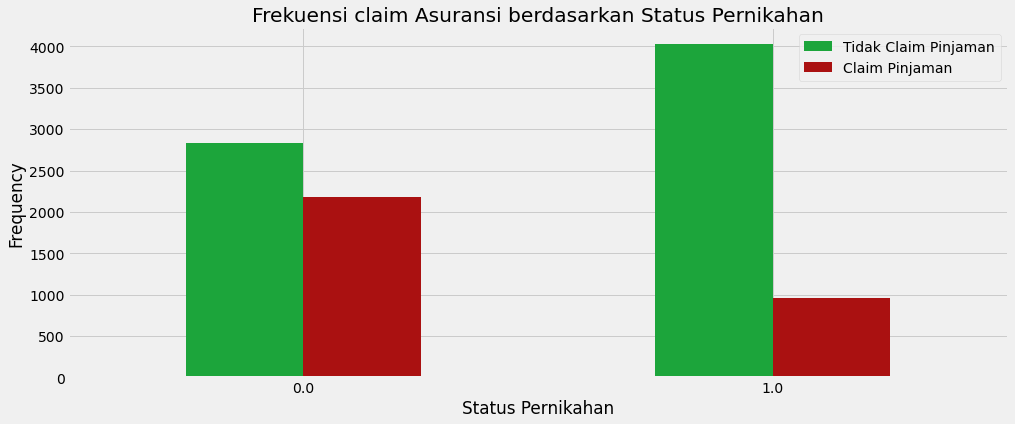

In [24]:
pd.crosstab(data.MARRIED,data.OUTCOME).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111', '#FFA500' ])
plt.title('Frekuensi claim Asuransi berdasarkan Status Pernikahan')
plt.xlabel('Status Pernikahan')
plt.xticks(rotation=0)
plt.legend(["Tidak Claim Pinjaman", "Claim Pinjaman"])
plt.ylabel('Frequency')
plt.show()

Data nasabah yang menikah lebih banyak dibandingkan yang single tapi, lebih banyak yang single klaim pinjaman, status pernikahan bisa berpengaruh terhadap pinjaman

<AxesSubplot:>

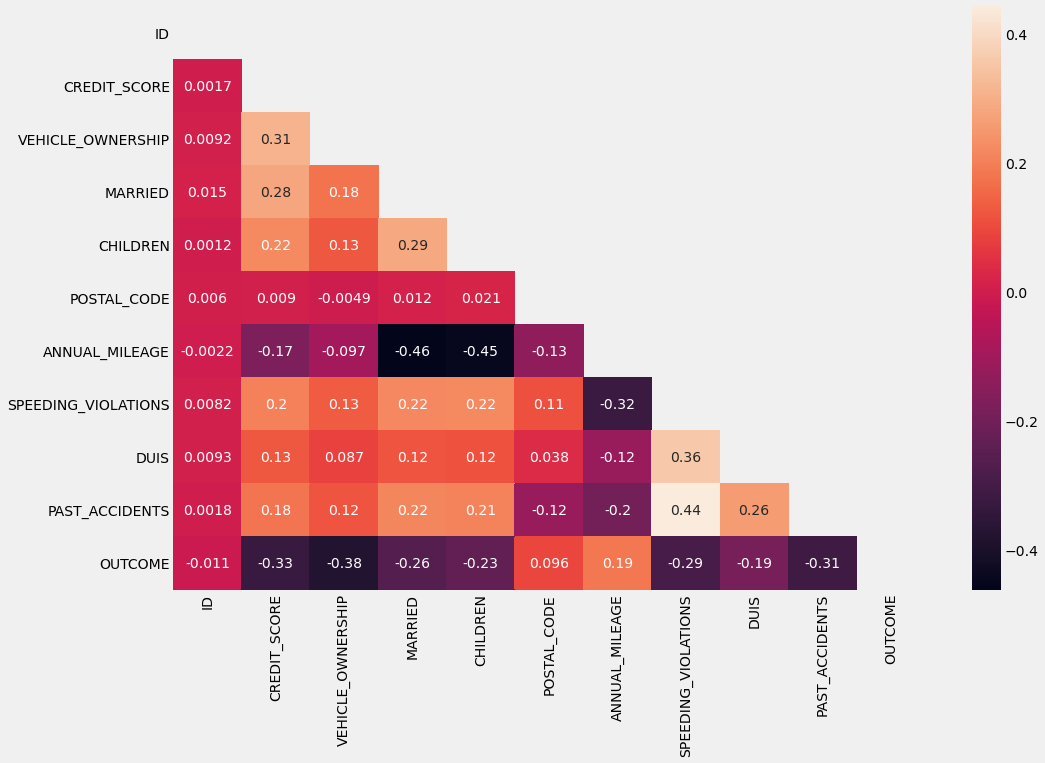

In [25]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True, mask=np.triu(data.corr()))

Hitmap korelasi antar fitur numerik, dari semua fitur independent atau tidak berkorelasi satu sama lain

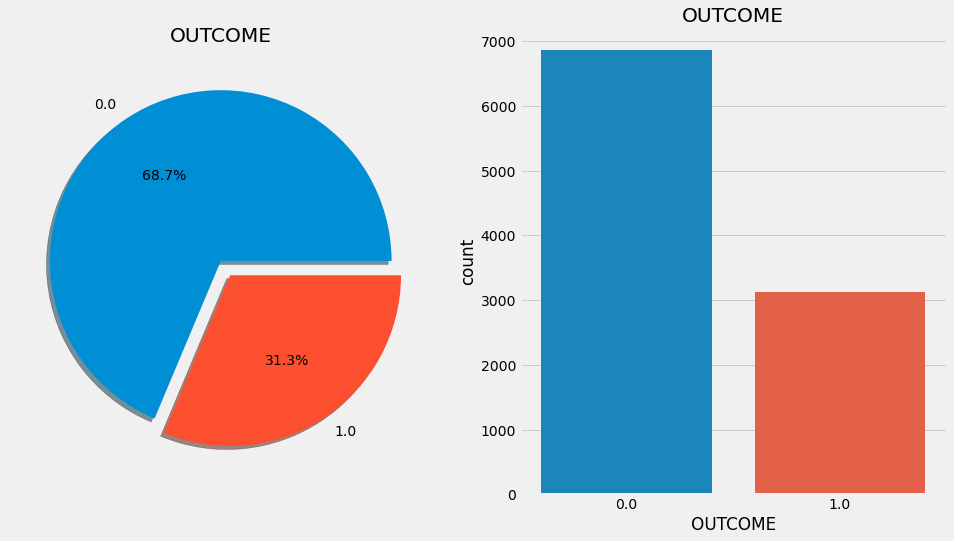

In [26]:
f,ax=plt.subplots(1,2,figsize=(15,8))
data['OUTCOME'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('OUTCOME')
ax[0].set_ylabel('')
sns.countplot('OUTCOME',data=data,ax=ax[1])
ax[1].set_title('OUTCOME')
plt.show()

Label targetnya imbalanced Mild karna perbandinganya 68% untuk 0(Tidak Klaim) dan 32% untuk 1(Klaim)

# 5. Data Preprocessing

In [27]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,Very Old,female,majority,Newbie,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,Young,male,majority,Newbie,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,Young,female,majority,Newbie,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,Young,male,majority,Newbie,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,Middle Age,male,majority,Amateur,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## Merubah data kategorikal berbentuk numerik menjadi kategorikal

In [28]:
data['MARRIED'] = data['MARRIED'].map({0:'No',
                                       1: 'Yes'})
data['CHILDREN'] = data['CHILDREN'].map({0:'No',
                                         1: 'Yes'})
data['VEHICLE_OWNERSHIP'] = data['VEHICLE_OWNERSHIP'].map({0:'No',
                                                           1: 'Yes'})

Merubah column categorical yang berbentuk numerik menjadi column kategorikal nominal

## Merubah Data Ordinal menjadi Numerik

In [29]:
data['EDUCATION'].unique()

array(['high school', 'none', 'university'], dtype=object)

In [30]:
data['INCOME'].unique()

array(['upper class', 'poverty', 'working class', 'middle class'],
      dtype=object)

In [31]:
data['EDUCATION'] = data['EDUCATION'].map({'none':0,
                                       'high school': 1,
                                       'university': 2})
data['INCOME'] = data['INCOME'].map({'poverty' :0,
                                         'working class': 1,
                                         'middle class': 2,
                                         'upper class': 3})

Data kategorikal ordinal yang dirubah menjadi angka akan di drop pada saat scaling

In [32]:
data.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,Very Old,female,majority,Newbie,1,3,0.629027,Yes,after 2015,No,Yes,10238,12000.0,sedan,0,0,0,0.0
1,750365,Young,male,majority,Newbie,0,0,0.357757,No,before 2015,No,No,10238,16000.0,sedan,0,0,0,1.0
2,199901,Young,female,majority,Newbie,1,1,0.493146,Yes,before 2015,No,No,10238,11000.0,sedan,0,0,0,0.0
3,478866,Young,male,majority,Newbie,2,1,0.206013,Yes,before 2015,No,Yes,32765,11000.0,sedan,0,0,0,0.0
4,731664,Middle Age,male,majority,Amateur,0,1,0.388366,Yes,before 2015,No,No,32765,12000.0,sedan,2,0,1,1.0


In [33]:
data_inf = data.sample(10, random_state=9)
data_inf

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
3644,185905,Middle Age,male,majority,Amateur,1,0,0.448060,Yes,before 2015,No,Yes,10238,15000.0,sedan,1,0,1,0.0
9184,363870,Very Old,female,majority,Expert,1,3,0.797687,Yes,after 2015,Yes,Yes,10238,9000.0,sedan,4,1,4,0.0
520,372474,Old,female,majority,Advanced,1,3,0.432835,Yes,after 2015,Yes,No,10238,13000.0,sedan,1,0,0,0.0
5685,868371,Very Old,male,majority,Expert,1,3,0.582587,Yes,after 2015,Yes,Yes,10238,11000.0,sedan,10,0,1,0.0
2401,714609,Middle Age,male,majority,Amateur,1,0,0.374125,No,before 2015,No,No,10238,13000.0,sedan,1,0,3,1.0
6510,974307,Young,male,majority,Newbie,0,0,NaN,No,before 2015,No,Yes,10238,10000.0,sedan,0,0,0,1.0
9853,635692,Middle Age,female,majority,Amateur,1,2,0.593888,Yes,before 2015,No,Yes,10238,14000.0,sedan,1,0,0,0.0
7185,825706,Young,male,majority,Newbie,1,0,0.294914,No,before 2015,No,No,10238,15000.0,sedan,0,0,0,1.0
7444,655303,Old,male,majority,Amateur,0,1,0.308616,No,before 2015,No,Yes,92101,12000.0,sedan,2,1,1,1.0
49,105372,Middle Age,female,minority,Amateur,0,1,0.503950,No,before 2015,No,Yes,10238,14000.0,sedan,1,0,0,0.0


Mengambil 10 sample data untuk dijadikan data inferenced

In [34]:
data_train = data.drop(data_inf.index)
data_train

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,Very Old,female,majority,Newbie,1,3,0.629027,Yes,after 2015,No,Yes,10238,12000.0,sedan,0,0,0,0.0
1,750365,Young,male,majority,Newbie,0,0,0.357757,No,before 2015,No,No,10238,16000.0,sedan,0,0,0,1.0
2,199901,Young,female,majority,Newbie,1,1,0.493146,Yes,before 2015,No,No,10238,11000.0,sedan,0,0,0,0.0
3,478866,Young,male,majority,Newbie,2,1,0.206013,Yes,before 2015,No,Yes,32765,11000.0,sedan,0,0,0,0.0
4,731664,Middle Age,male,majority,Amateur,0,1,0.388366,Yes,before 2015,No,No,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,Middle Age,female,majority,Amateur,2,3,0.582787,Yes,before 2015,No,No,10238,16000.0,sedan,0,0,1,0.0
9996,910346,Middle Age,female,majority,Amateur,0,2,0.522231,Yes,after 2015,No,Yes,32765,NaN,sedan,1,0,0,0.0
9997,468409,Middle Age,male,majority,Newbie,1,2,0.470940,Yes,before 2015,No,Yes,10238,14000.0,sedan,0,0,0,0.0
9998,903459,Middle Age,female,majority,Amateur,1,0,0.364185,No,before 2015,No,Yes,10238,13000.0,sedan,2,0,1,1.0


Drop Data inferenced dari data train

In [35]:
data_train.reset_index(drop=True, inplace=True)
data_inf.reset_index(drop=True, inplace=True)
data_inf

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,185905,Middle Age,male,majority,Amateur,1,0,0.448060,Yes,before 2015,No,Yes,10238,15000.0,sedan,1,0,1,0.0
1,363870,Very Old,female,majority,Expert,1,3,0.797687,Yes,after 2015,Yes,Yes,10238,9000.0,sedan,4,1,4,0.0
2,372474,Old,female,majority,Advanced,1,3,0.432835,Yes,after 2015,Yes,No,10238,13000.0,sedan,1,0,0,0.0
3,868371,Very Old,male,majority,Expert,1,3,0.582587,Yes,after 2015,Yes,Yes,10238,11000.0,sedan,10,0,1,0.0
4,714609,Middle Age,male,majority,Amateur,1,0,0.374125,No,before 2015,No,No,10238,13000.0,sedan,1,0,3,1.0
5,974307,Young,male,majority,Newbie,0,0,NaN,No,before 2015,No,Yes,10238,10000.0,sedan,0,0,0,1.0
6,635692,Middle Age,female,majority,Amateur,1,2,0.593888,Yes,before 2015,No,Yes,10238,14000.0,sedan,1,0,0,0.0
7,825706,Young,male,majority,Newbie,1,0,0.294914,No,before 2015,No,No,10238,15000.0,sedan,0,0,0,1.0
8,655303,Old,male,majority,Amateur,0,1,0.308616,No,before 2015,No,Yes,92101,12000.0,sedan,2,1,1,1.0
9,105372,Middle Age,female,minority,Amateur,0,1,0.503950,No,before 2015,No,Yes,10238,14000.0,sedan,1,0,0,0.0


Reset Index data train dan data inferenced

In [36]:
data_train.shape

(9990, 19)

Data train sekarang menjadi 9990

## Split Dataset antara X dan y

In [37]:
X = data_train.drop('OUTCOME', axis=1) 
y= data_train['OUTCOME']
X

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
0,569520,Very Old,female,majority,Newbie,1,3,0.629027,Yes,after 2015,No,Yes,10238,12000.0,sedan,0,0,0
1,750365,Young,male,majority,Newbie,0,0,0.357757,No,before 2015,No,No,10238,16000.0,sedan,0,0,0
2,199901,Young,female,majority,Newbie,1,1,0.493146,Yes,before 2015,No,No,10238,11000.0,sedan,0,0,0
3,478866,Young,male,majority,Newbie,2,1,0.206013,Yes,before 2015,No,Yes,32765,11000.0,sedan,0,0,0
4,731664,Middle Age,male,majority,Amateur,0,1,0.388366,Yes,before 2015,No,No,32765,12000.0,sedan,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,323164,Middle Age,female,majority,Amateur,2,3,0.582787,Yes,before 2015,No,No,10238,16000.0,sedan,0,0,1
9986,910346,Middle Age,female,majority,Amateur,0,2,0.522231,Yes,after 2015,No,Yes,32765,NaN,sedan,1,0,0
9987,468409,Middle Age,male,majority,Newbie,1,2,0.470940,Yes,before 2015,No,Yes,10238,14000.0,sedan,0,0,0
9988,903459,Middle Age,female,majority,Amateur,1,0,0.364185,No,before 2015,No,Yes,10238,13000.0,sedan,2,0,1


Split antara X dan y

In [38]:
y

0       0.0
1       1.0
2       0.0
3       0.0
4       1.0
       ... 
9985    0.0
9986    0.0
9987    0.0
9988    1.0
9989    0.0
Name: OUTCOME, Length: 9990, dtype: float64

Data target

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=9)

print('X_Train Size :', X_train.shape)
print('X_Test Size :', X_test.shape)
print('y_Train Size :', y_train.shape)
print('y_Test Size :', y_test.shape)

X_Train Size : (7992, 18)
X_Test Size : (1998, 18)
y_Train Size : (7992,)
y_Test Size : (1998,)


Split data train dan test menggunakan perbandingan 80:20

## Handling Outlier

In [40]:
def diagnostic_plots(X_train, column):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(X_train[column],bins=30, palette='deep')
    plt.title(f'Distribution of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(X_train[column])
    plt.title(f'Boxplot of {column}')

    skewness = X_train[column].skew(axis = 0, skipna = True)
    print (f'Skewness of {column} =', skewness)

Membuat fungsi visualisasi distribusi data, boxplot dan cek skew data

In [41]:
num_columns = X_train.select_dtypes (include=np.number).columns.tolist()

Membuat variable num_columns

Skewness of ID = -0.003671657022572397
Skewness of EDUCATION = -0.34382910978080544
Skewness of INCOME = -0.5293523542568692
Skewness of CREDIT_SCORE = -0.24296821410786165
Skewness of POSTAL_CODE = 2.684037956217049
Skewness of ANNUAL_MILEAGE = 0.028613895799058493
Skewness of SPEEDING_VIOLATIONS = 2.3860094256036124
Skewness of DUIS = 2.676661589755886
Skewness of PAST_ACCIDENTS = 2.138338078767545


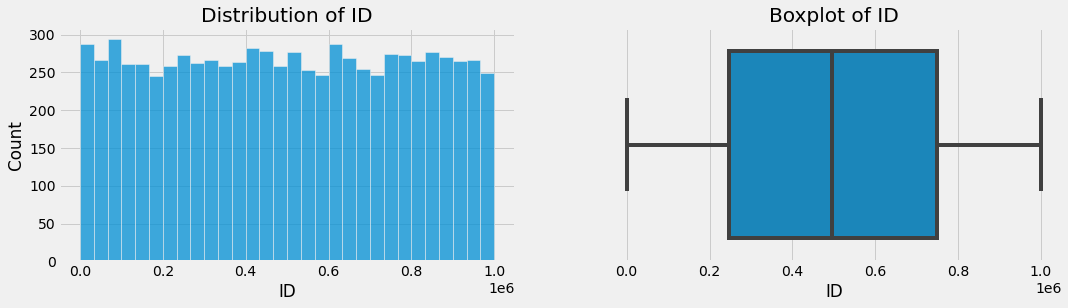

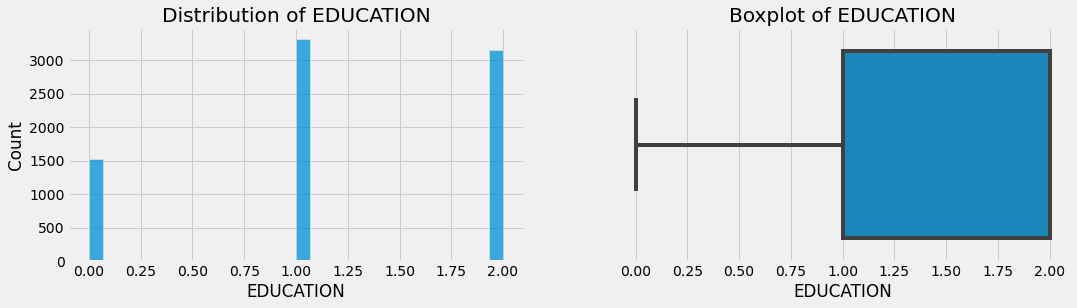

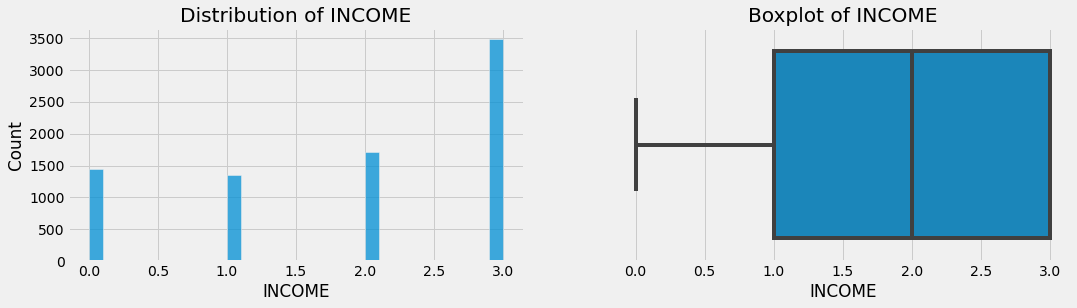

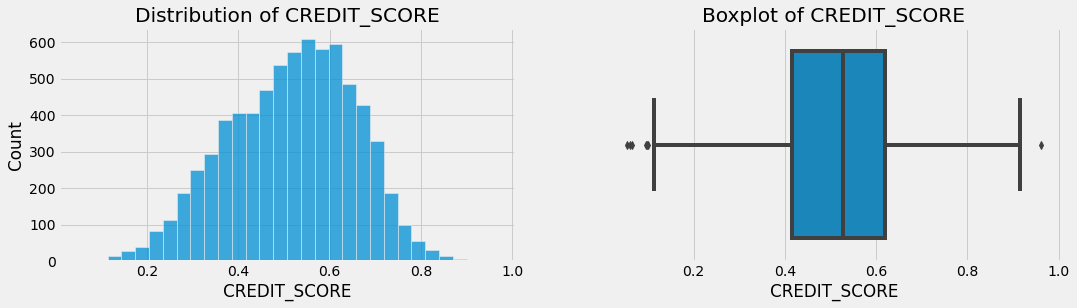

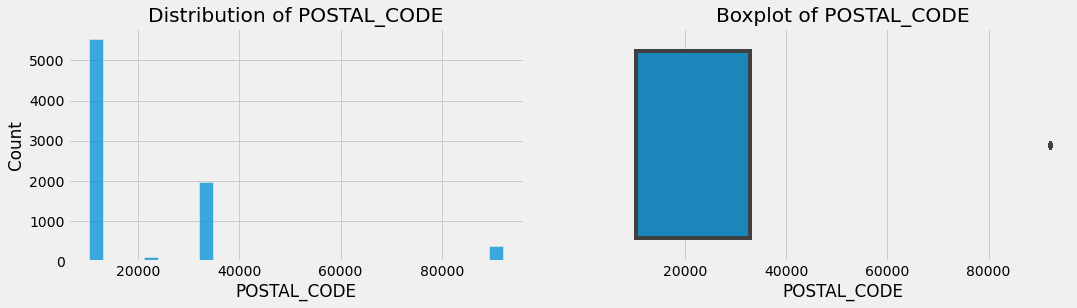

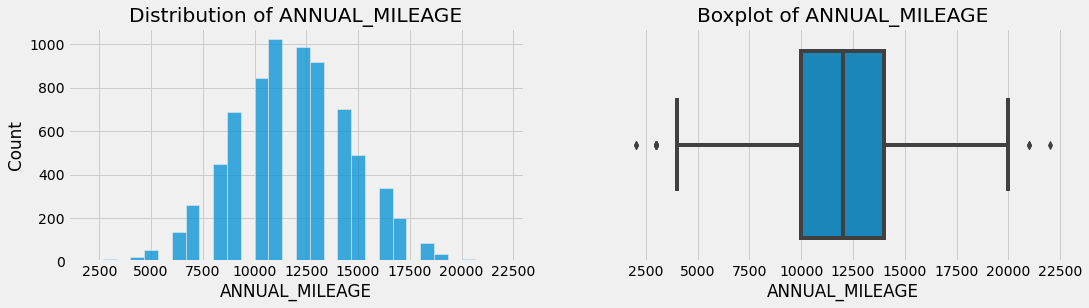

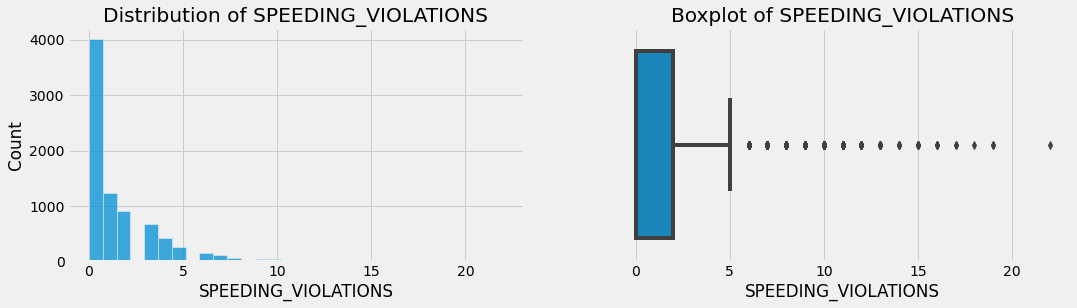

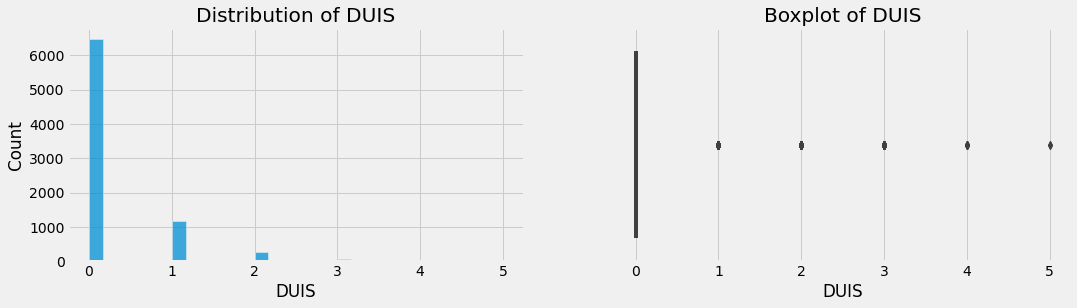

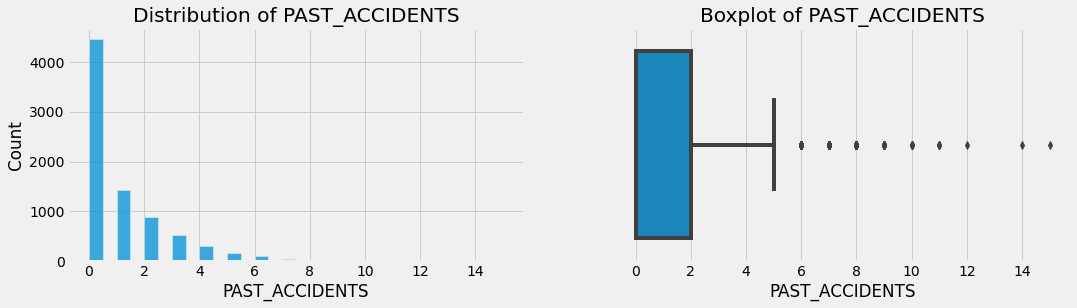

In [42]:
for column in num_columns:
    diagnostic_plots (X_train, column)

Diatas adalah hasil visualisasi histogram, boxplot dan nilai skewnes

In [43]:
def check_outliers(X_train, column):
    skewness = X_train[column].skew(axis=0, skipna=True)
    if skewness <= 0.5 and skewness >=-0.5:
       
        upper_boundary = X_train[column].mean() + 3 * X_train[column].std()
        lower_boundary = X_train[column].mean() - 3 * X_train[column].std()
        print(['Normal'])
        print(f'Upper Boundary of {column}:', upper_boundary)
        print(f'Lower Boundary of {column}:', lower_boundary)
        jumlah_outlier_upper = format(len(X_train[X_train[column] > upper_boundary]))
        print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
        jumlah_outlier_lower  = format(len(X_train[X_train[column]<lower_boundary]))
        print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
        persentase_outlier_upper = format(len(X_train[X_train[column] > upper_boundary])  / len(X_train)*100)
        print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
        persentase_outlier_lower = format(len(X_train[X_train[column] < lower_boundary])  / len(X_train)*100)
        print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
        print('-'*100)
    else:
         IQR = X_train[column].quantile(0.75) - X_train[column].quantile(0.25)
         lower_boundary = X_train[column].quantile(0.25) - (IQR * 1.5)
         upper_boundary = X_train[column].quantile(0.75) + (IQR * 1.5)
         print(['Skewed'])
         print(f'Upper Boundary of {column}:', upper_boundary)
         print(f'Lower Boundary of {column}:', lower_boundary)
         jumlah_outlier_upper = format(len(X_train[X_train[column] > upper_boundary]))
         print(f'Total Data Above Upper Boundary {column}:', jumlah_outlier_upper)
         jumlah_outlier_lower  = format(len(X_train[X_train[column]<lower_boundary]))
         print(f'Total Data Below Lower Boundary {column}:', jumlah_outlier_lower)
         persentase_outlier_upper = format(len(X_train[X_train[column] > upper_boundary])  / len(X_train)*100)
         print(f'% Data Above Upper Boundary {column}:', persentase_outlier_upper)
         persentase_outlier_lower = format(len(X_train[X_train[column] < lower_boundary])  / len(X_train)*100)
         print(f'% Data Below Lower Boundary {column}:', persentase_outlier_lower)
         print('-'*100)

Membuat fungis cek outlier

In [44]:
outlier_feature = ['CREDIT_SCORE','POSTAL_CODE','ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']

Masukan fitur yang akan di cek outlier

In [45]:
for feature in outlier_feature:
    check_outliers(X_train,feature)

['Normal']
Upper Boundary of CREDIT_SCORE: 0.9314039313142217
Lower Boundary of CREDIT_SCORE: 0.10121292867803017
Total Data Above Upper Boundary CREDIT_SCORE: 1
Total Data Below Lower Boundary CREDIT_SCORE: 6
% Data Above Upper Boundary CREDIT_SCORE: 0.012512512512512512
% Data Below Lower Boundary CREDIT_SCORE: 0.07507507507507508
----------------------------------------------------------------------------------------------------
['Skewed']
Upper Boundary of POSTAL_CODE: 66555.5
Lower Boundary of POSTAL_CODE: -23552.5
Total Data Above Upper Boundary POSTAL_CODE: 381
Total Data Below Lower Boundary POSTAL_CODE: 0
% Data Above Upper Boundary POSTAL_CODE: 4.767267267267267
% Data Below Lower Boundary POSTAL_CODE: 0.0
----------------------------------------------------------------------------------------------------
['Normal']
Upper Boundary of ANNUAL_MILEAGE: 20116.13867770922
Lower Boundary of ANNUAL_MILEAGE: 3240.195851686307
Total Data Above Upper Boundary ANNUAL_MILEAGE: 3
Total Da

Memunculkan jumlah Outlier

In [46]:
print('X_train - Before Handling :', X_train.shape)
outlier_trimmer1 = OutlierTrimmer(capping_method='gaussian',
                   tail='both',
                   fold=1.5,
                   variables=['CREDIT_SCORE', 'ANNUAL_MILEAGE'],
                   missing_values='ignore'
                   )

outlier_trimmer1.fit(X_train)

X_train = outlier_trimmer1.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (7992, 18)
X_train - After Handling :  (6038, 18)


Trimming kolom CREDIT_SCORE dan ANNUAL_MILEAGE menggunakan gaussian dikarenakan memiliki outlier dibawah 5% dan berdistribusi normal

In [47]:
print('X_train - Before Handling :', X_train.shape)
outlier_trimmer1 = OutlierTrimmer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['PAST_ACCIDENTS'],
                   missing_values='ignore'
                   )

outlier_trimmer1.fit(X_train)

X_train = outlier_trimmer1.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (6038, 18)
X_train - After Handling :  (5860, 18)


Trimming kolom PAST_ACCIDENTS meggunakan iqr dikarenakan memiliki outlier dibawah 5% dan berdistribusi skew

In [48]:
print('X_train - Before Handling :', X_train.shape)
windsorizer = Winsorizer(capping_method='iqr',
                   tail='both',
                   fold=1.5,
                   variables=['SPEEDING_VIOLATIONS'],
                   missing_values='ignore'
                   )

windsorizer.fit(X_train)

X_train = windsorizer.transform(X_train)
print('X_train - After Handling : ', X_train.shape)

X_train - Before Handling : (5860, 18)
X_train - After Handling :  (5860, 18)


Capping kolom SPEEDING_VIOLATIONS meggunakan iqr dikarenakan memiliki jumlah outlier diatas 5% dan berdistribusi skew

In [49]:
y_train = y_train[X_train.index]

Menyamakan y_train dengan X_train dikarenakan X_train yang di trimming

## Handle Missing Value

In [50]:
X_train.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           653
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         635
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
dtype: int64

Terdapat missing value CREDIT_SCORE 653 dan ANNUAL_MILEAGE 635 di X_train

In [51]:
X_test.isnull().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           202
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         211
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
dtype: int64

Terdapat missing value CREDIT_SCORE 202 dan ANNUAL_MILEAGE 211 di X_test

In [52]:
data_inf.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           1
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Terdapat missing value CREDIT_SCORE 1 di Inference

In [53]:
def input_na_mean(data, column):
    mean_value = X_train[column].mean()

    fillna_mean = data[column].fillna(mean_value, inplace =True)

    return fillna_mean

Fungsi handle missing value menggunakan mean dikarenakan data yang memiliki outlier berdistribusi normal

In [54]:
inpute_mean_feature = ['CREDIT_SCORE', 'ANNUAL_MILEAGE']

Input kolom yang akan di handle missing value

In [55]:
for column in inpute_mean_feature:
    input_na_mean(X_test,column)

Handle missing Value pada X_test terlebih dahulu agar nilai mean akan tetap sama baik sebelum dan sesudah handling

In [56]:
for column in inpute_mean_feature:
    input_na_mean(data_inf,column)

Selanjutnya pada data inferenced

In [57]:
for column in inpute_mean_feature:
    input_na_mean(X_train,column)

Terakhir baru handle missing value pada X_train dikarenakan semua data yang missing value harus menggunakan mean asli dari X_train

In [58]:
X_train.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
dtype: int64

In [59]:
X_test.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
dtype: int64

In [60]:
data_inf.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Semua data telah di handle missing value sudah tidak ada lagi missing value

## Fitur Selection

In [61]:
X_train.corr(method='pearson')

,ID,EDUCATION,INCOME,CREDIT_SCORE,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS
ID,1.000000,-0.023534,-0.009361,-0.010227,0.010073,-0.004766,0.006137,0.018454,-0.005937
EDUCATION,-0.023534,1.000000,0.541293,0.349174,0.010428,-0.078931,0.108814,0.067258,0.093391
INCOME,-0.009361,0.541293,1.000000,0.640131,0.005321,-0.178324,0.306778,0.161825,0.273839
CREDIT_SCORE,-0.010227,0.349174,0.640131,1.000000,0.005832,-0.116816,0.174658,0.080901,0.146119
POSTAL_CODE,0.010073,0.010428,0.005321,0.005832,1.000000,-0.096537,0.097616,0.024501,-0.123687
ANNUAL_MILEAGE,-0.004766,-0.078931,-0.178324,-0.116816,-0.096537,1.000000,-0.226030,-0.078253,-0.116066
SPEEDING_VIOLATIONS,0.006137,0.108814,0.306778,0.174658,0.097616,-0.226030,1.000000,0.355519,0.456539
DUIS,0.018454,0.067258,0.161825,0.080901,0.024501,-0.078253,0.355519,1.000000,0.255498
PAST_ACCIDENTS,-0.005937,0.093391,0.273839,0.146119,-0.123687,-0.116066,0.456539,0.255498,1.000000


Fitur Selection menggunakan pearson untuk fitur numerik

<AxesSubplot:>

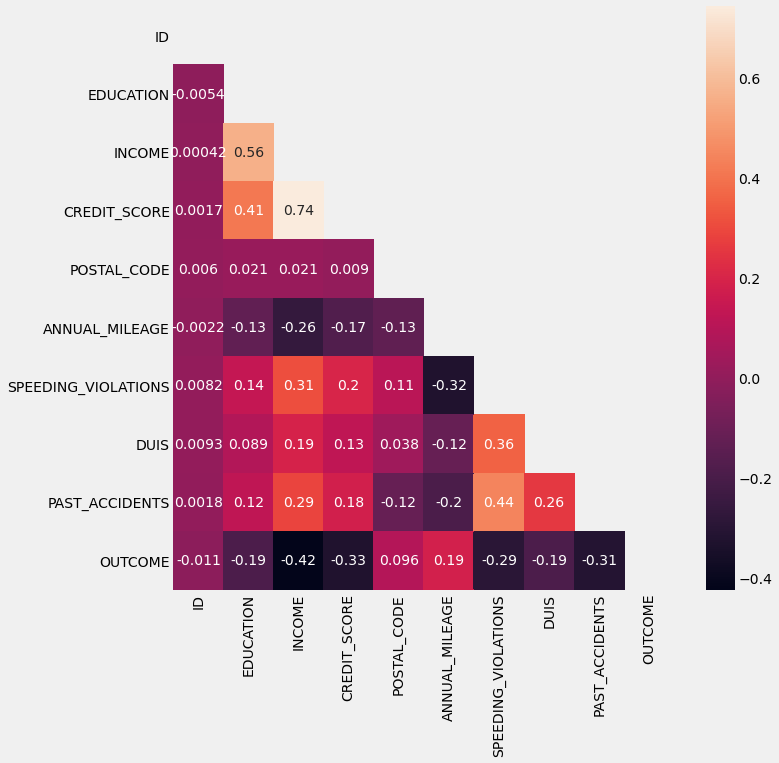

In [62]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, mask=np.triu(data.corr()))

Hitmap correlation hanya fiturnya tidak saling berkorelasi

In [63]:
c = data.corr(method = "pearson")
c_sorted = c.sort_values( by=['OUTCOME'], ascending = False )
c_sorted["OUTCOME"]

OUTCOME                1.000000
ANNUAL_MILEAGE         0.187154
POSTAL_CODE            0.095889
ID                    -0.010506
DUIS                  -0.189352
EDUCATION             -0.189357
SPEEDING_VIOLATIONS   -0.291862
PAST_ACCIDENTS        -0.311495
CREDIT_SCORE          -0.325286
INCOME                -0.422996
Name: OUTCOME, dtype: float64

Drop Kolom yang memiliki korelasi kecil

1. Kolom numerik di drop berdasarkan pearson korelasi dengan data y
    - 0 : Tidak ada korelasi
    - 0.00 - 0.25 : korelasi sangat lemah
    - 0.25 - 0.50 : korelasi cukup
    - 0.50 - 0.75 : korleasi kuat
    - 0.75 - 0.99 : korelasi sangat kuat
    - 1 : korelasi sempurna
- Sumber : http://www.statistikolahdata.com/2010/11/korelasi-pearson.html#:~:text=0%20%3A%20Tidak%20ada%20korelasi,0.50%20%2D%200.75%20%3A%20korleasi%20kuat
2. kolom categorical di drop berasarkan explore data analisis

In [64]:
X_train.drop('ID', axis=1, inplace=True)
X_test.drop('ID', axis=1, inplace=True)
X_train.drop('POSTAL_CODE', axis=1, inplace=True)
X_test.drop('POSTAL_CODE', axis=1, inplace=True)
X_train.drop('RACE', axis=1, inplace=True)
X_test.drop('RACE', axis=1, inplace=True)
X_train.drop('GENDER', axis=1, inplace=True)
X_test.drop('GENDER', axis=1, inplace=True)
X_train.drop('VEHICLE_YEAR', axis=1, inplace=True)
X_test.drop('VEHICLE_YEAR', axis=1, inplace=True)
X_train.drop('VEHICLE_TYPE', axis=1, inplace=True)
X_test.drop('VEHICLE_TYPE', axis=1, inplace=True)
X_train.drop('DUIS', axis=1, inplace=True)
X_test.drop('DUIS', axis=1, inplace=True)
X_train.drop('AGE', axis=1, inplace=True)
X_test.drop('AGE', axis=1, inplace=True)

In [65]:
X_train

,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS
2506,Newbie,1,1,0.393146,No,No,Yes,9000.0,0.0,0
3700,Newbie,0,0,0.309834,Yes,No,Yes,11000.0,0.0,0
6161,Advanced,2,3,0.607017,Yes,Yes,Yes,11000.0,0.0,0
9401,Expert,2,3,0.644225,Yes,No,Yes,13000.0,5.0,3
3790,Amateur,2,3,0.628496,Yes,Yes,Yes,11000.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...
7095,Advanced,2,3,0.482946,Yes,Yes,Yes,12000.0,2.0,1
636,Newbie,2,2,0.718479,Yes,No,Yes,15000.0,0.0,0
4162,Newbie,1,2,0.571575,No,Yes,Yes,10000.0,0.0,0
2350,Amateur,0,2,0.528129,No,No,No,12000.0,0.0,1


X_train terbaru

In [66]:
X_test

,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS
275,Advanced,0,2,0.449012,Yes,Yes,Yes,7000.000000,7,1
2409,Expert,2,2,0.530778,Yes,Yes,Yes,11548.899522,2,5
6809,Amateur,2,3,0.718298,Yes,Yes,Yes,8000.000000,1,0
6820,Amateur,1,2,0.528718,Yes,Yes,Yes,13000.000000,0,1
7901,Expert,2,2,0.500267,Yes,Yes,Yes,9000.000000,5,8
...,...,...,...,...,...,...,...,...,...,...
2918,Newbie,1,0,0.528718,No,No,Yes,11548.899522,0,0
3333,Newbie,0,0,0.613257,No,No,Yes,13000.000000,0,0
1486,Advanced,1,3,0.825913,Yes,Yes,Yes,10000.000000,2,0
7730,Advanced,2,3,0.507934,Yes,Yes,Yes,9000.000000,3,6


X_test terbaru

## Split antara fitur numerik dan kategorical


In [67]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

num_columns = X_test.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_test.select_dtypes(include=['object']).columns.tolist()

print('Numerical Columns: ', num_columns)
print('Categorical Columns: ', cat_columns)

Numerical Columns:  ['EDUCATION', 'INCOME', 'CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'PAST_ACCIDENTS']
Categorical Columns:  ['DRIVING_EXPERIENCE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN']


In [68]:
X_train_num = X_train[num_columns]
X_train_cat = X_train[cat_columns]

X_test_num = X_test[num_columns]
X_test_cat = X_test[cat_columns]

Memisahkan Kolom numerik dan kategorikal

In [69]:
X_train_num

,EDUCATION,INCOME,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS
2506,1,1,0.393146,9000.0,0.0,0
3700,0,0,0.309834,11000.0,0.0,0
6161,2,3,0.607017,11000.0,0.0,0
9401,2,3,0.644225,13000.0,5.0,3
3790,2,3,0.628496,11000.0,0.0,2
...,...,...,...,...,...,...
7095,2,3,0.482946,12000.0,2.0,1
636,2,2,0.718479,15000.0,0.0,0
4162,1,2,0.571575,10000.0,0.0,0
2350,0,2,0.528129,12000.0,0.0,1


Data Numerik

In [70]:
X_train_cat

,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN
2506,Newbie,No,No,Yes
3700,Newbie,Yes,No,Yes
6161,Advanced,Yes,Yes,Yes
9401,Expert,Yes,No,Yes
3790,Amateur,Yes,Yes,Yes
...,...,...,...,...
7095,Advanced,Yes,Yes,Yes
636,Newbie,Yes,No,Yes
4162,Newbie,No,Yes,Yes
2350,Amateur,No,No,No


Data kategorikal

### Memisahkan kolom categorical yang berbentuk numerik dari data numerik

In [71]:
X_train_num_2 = X_train_num.drop(columns=['EDUCATION', 'INCOME'])
X_test_num_2 = X_test_num.drop(columns=['EDUCATION', 'INCOME'])
X_train_num_2.head()

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS
2506,0.393146,9000.0,0.0,0
3700,0.309834,11000.0,0.0,0
6161,0.607017,11000.0,0.0,0
9401,0.644225,13000.0,5.0,3
3790,0.628496,11000.0,0.0,2


Drop Education dan Income karena data numerik supaya tidak ikut discaling

In [72]:
X_train_num_3 = X_train_num[['EDUCATION', 'INCOME']]
X_test_num_3 = X_test_num[['EDUCATION', 'INCOME']]
X_train_num_3.head()

,EDUCATION,INCOME
2506,1,1
3700,0,0
6161,2,3
9401,2,3
3790,2,3


Membuat Variable yang berisi Education dan Income

In [73]:
X_train_cat

,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN
2506,Newbie,No,No,Yes
3700,Newbie,Yes,No,Yes
6161,Advanced,Yes,Yes,Yes
9401,Expert,Yes,No,Yes
3790,Amateur,Yes,Yes,Yes
...,...,...,...,...
7095,Advanced,Yes,Yes,Yes
636,Newbie,Yes,No,Yes
4162,Newbie,No,Yes,Yes
2350,Amateur,No,No,No


## Fitur Scaling

In [74]:
scaler = StandardScaler()
scaler.fit(X_train_num_2)

X_train_num_scaled = scaler.transform(X_train_num_2)
X_test_num_scaled = scaler.transform(X_test_num_2)

X_train_num_scaled

array([[-1.34017222, -1.34218746, -0.79344744, -0.71415256],
       [-2.16373637, -0.28903692, -0.79344744, -0.71415256],
       [ 0.77401295, -0.28903692, -0.79344744, -0.71415256],
       ...,
       [ 0.42365891, -0.81561219, -0.79344744, -0.71415256],
       [-0.00582215,  0.23753836, -0.79344744,  0.0423431 ],
       [-1.3735403 ,  0.76411363, -0.79344744, -0.71415256]])

Fitur Scaling menggunakan Standard Scaller karena berdistribusi normal

In [75]:
X_train_num_final = np.concatenate([X_train_num_scaled, X_train_num_3], axis=1)
X_test_num_final = np.concatenate([X_test_num_scaled, X_test_num_3], axis=1)
X_test_num_final.shape

(1998, 6)

Menggabungkan kembali data ordinal yang tadi di drop

## Fitur Encoding

In [76]:
X_train_cat

,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN
2506,Newbie,No,No,Yes
3700,Newbie,Yes,No,Yes
6161,Advanced,Yes,Yes,Yes
9401,Expert,Yes,No,Yes
3790,Amateur,Yes,Yes,Yes
...,...,...,...,...
7095,Advanced,Yes,Yes,Yes
636,Newbie,Yes,No,Yes
4162,Newbie,No,Yes,Yes
2350,Amateur,No,No,No


In [77]:
X_test_cat

,DRIVING_EXPERIENCE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN
275,Advanced,Yes,Yes,Yes
2409,Expert,Yes,Yes,Yes
6809,Amateur,Yes,Yes,Yes
6820,Amateur,Yes,Yes,Yes
7901,Expert,Yes,Yes,Yes
...,...,...,...,...
2918,Newbie,No,No,Yes
3333,Newbie,No,No,Yes
1486,Advanced,Yes,Yes,Yes
7730,Advanced,Yes,Yes,Yes


In [78]:
encoder = OneHotEncoder()
encoder.fit(X_train_cat)
X_train_cat_enc = encoder.transform(X_train_cat).toarray()
OHE_model = OneHotEncoder(handle_unknown = 'ignore')
X_test_cat_enc = encoder.transform(X_test_cat).toarray()
OHE_model = OneHotEncoder(handle_unknown = 'ignore')
X_train_cat_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Encoding menggunakan One Hot Encoder untuk data nominal

In [79]:
X_train_final = np.concatenate([X_train_num_final, X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_num_final, X_test_cat_enc], axis=1)
X_train_final

array([[-1.34017222, -1.34218746, -0.79344744, ...,  0.        ,
         0.        ,  1.        ],
       [-2.16373637, -0.28903692, -0.79344744, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.77401295, -0.28903692, -0.79344744, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.42365891, -0.81561219, -0.79344744, ...,  1.        ,
         0.        ,  1.        ],
       [-0.00582215,  0.23753836, -0.79344744, ...,  0.        ,
         1.        ,  0.        ],
       [-1.3735403 ,  0.76411363, -0.79344744, ...,  0.        ,
         0.        ,  1.        ]])

Menggabungkan Data Numerik dan Kategorikal

# 6. Model Definition

In [80]:
lr = LogisticRegression(random_state=9)

Baseline Model Logistic Regression

In [81]:
dt = DecisionTreeClassifier(random_state=9)

Baseline Model Decission Tree

In [82]:
rf = RandomForestClassifier(random_state=9)

Baseline Model Random Forest

In [83]:
xgb = XGBClassifier(random_state=42)

Baseline Model XGBoost

# 7. Model Training

In [84]:
lr.fit(X_train_final, y_train)

LogisticRegression(random_state=9)

Model Training Logistic Regression

In [85]:
dt.fit(X_train_final, y_train)

DecisionTreeClassifier(random_state=9)

Model Training Decission Tree 

In [86]:
rf.fit(X_train_final, y_train)

RandomForestClassifier(random_state=9)

Model Training Random Forest

In [87]:
xgb.fit(X_train_final, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, reg_lambda=1, ...)

Model Training XGBoost

# 8. Model Evaluation

Untuk metrics penilainya menggunakan Precision dikarenakan False Positive yang paling berbahaya dikarenakan model memprediksi customer mengajukan pinjaman padahal kenyataanya tidak untuk meminimalkan False Positive

Train Set Logistic Regression
Precision :  0.6995827538247567 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.90      0.87      4139
         1.0       0.70      0.58      0.64      1721

    accuracy                           0.80      5860
   macro avg       0.77      0.74      0.75      5860
weighted avg       0.80      0.80      0.80      5860
 

Confusion Matrix      : 


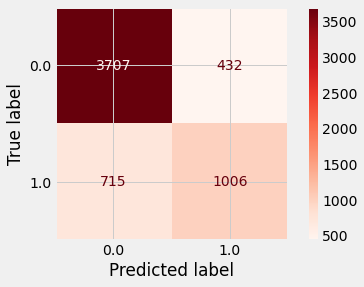

In [88]:
y_pred_train_lr = lr.predict(X_train_final)

print('Train Set Logistic Regression')
print('Precision : ', precision_score(y_train, y_pred_train_lr), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_lr), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_train_final, y_train, cmap='Reds'))

Train Set Logistic Regression

Train set Decision Tree
Precision :  0.9959016393442623 

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4139
         1.0       1.00      0.99      0.99      1721

    accuracy                           1.00      5860
   macro avg       1.00      0.99      0.99      5860
weighted avg       1.00      1.00      1.00      5860
 

Confusion Matrix      : 


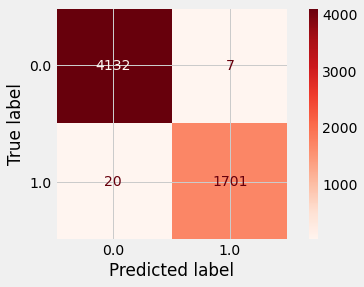

In [89]:
y_pred_train_dt = dt.predict(X_train_final)

print('Train set Decision Tree')
print('Precision : ', precision_score(y_train, y_pred_train_dt), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_dt), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(dt, X_train_final, y_train, cmap='Reds'))

Train Set Decision Tree

Train Set Random Forest
Precision :  0.9895953757225433 

Classification Report : 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4139
         1.0       0.99      0.99      0.99      1721

    accuracy                           1.00      5860
   macro avg       0.99      1.00      0.99      5860
weighted avg       1.00      1.00      1.00      5860
 

Confusion Matrix      : 


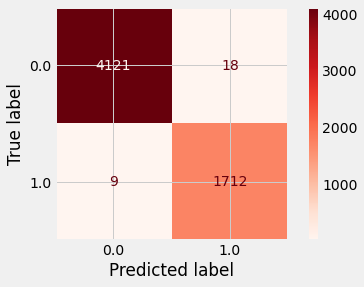

In [90]:
y_pred_train_rf = rf.predict(X_train_final)

print('Train Set Random Forest')
print('Precision : ', precision_score(y_train, y_pred_train_rf), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_rf), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(rf, X_train_final, y_train, cmap='Reds'))

Train Set Random Forest

Train Set XGBoost
Precision :  0.896136795440152 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      4139
         1.0       0.90      0.82      0.86      1721

    accuracy                           0.92      5860
   macro avg       0.91      0.89      0.90      5860
weighted avg       0.92      0.92      0.92      5860
 

Confusion Matrix      : 


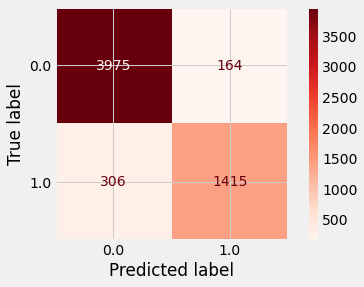

In [91]:
y_pred_train_xgb = xgb.predict(X_train_final)

print('Train Set XGBoost')
print('Precision : ', precision_score(y_train, y_pred_train_xgb), '\n')
print('Classification Report : \n', classification_report(y_train, y_pred_train_xgb), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(xgb, X_train_final, y_train, cmap='Reds'))

Train Set XGBoost

## Cross Validation

Untuk mengetahui mana model classification terbaik menggunakan Cross Validation

In [92]:
acc_train_cross_val = cross_val_score(lr, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('precision - All - Cross Validation  : ', acc_train_cross_val)
print('precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

precision - All - Cross Validation  :  [0.70895522 0.69204152 0.66883117 0.70446735 0.71575342]
precision - Mean - Cross Validation :  0.6980097387625079
precision - Std - Cross Validation  :  0.016512730702359167
precision - Range of Test-Set       :  0.6814970080601488 - 0.7145224694648671


Hasil Cross Validation Logistic Regression mendapatkan nilai mean precision 70%

In [93]:
acc_train_cross_val = cross_val_score(dt, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('precision - All - Cross Validation  : ', acc_train_cross_val)
print('precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

precision - All - Cross Validation  :  [0.53250774 0.56603774 0.54624277 0.56857143 0.54061625]
precision - Mean - Cross Validation :  0.5507951850847278
precision - Std - Cross Validation  :  0.014192223705678596
precision - Range of Test-Set       :  0.5366029613790492 - 0.5649874087904064


Hasil Cross Evaluation Decision Tree mendapatkan nilai mean precision 55%

In [94]:
acc_train_cross_val = cross_val_score(rf, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('precision - All - Cross Validation  : ', acc_train_cross_val)
print('precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

precision - All - Cross Validation  :  [0.65979381 0.67549669 0.63486842 0.70099668 0.65051903]
precision - Mean - Cross Validation :  0.6643349266220151
precision - Std - Cross Validation  :  0.022576290869048842
precision - Range of Test-Set       :  0.6417586357529662 - 0.686911217491064


Hasil Cross Validation  Random Forest mendapatkan mean precision 66%

In [95]:
acc_train_cross_val = cross_val_score(xgb, 
                                      X_train_final, 
                                      y_train, 
                                      cv=5, scoring="precision")

print('precision - All - Cross Validation  : ', acc_train_cross_val)
print('precision - Mean - Cross Validation : ', acc_train_cross_val.mean())
print('precision - Std - Cross Validation  : ', acc_train_cross_val.std())
print('precision - Range of Test-Set       : ', (acc_train_cross_val.mean()-acc_train_cross_val.std()) , '-', (acc_train_cross_val.mean()+acc_train_cross_val.std()))

precision - All - Cross Validation  :  [0.68231047 0.6509434  0.63157895 0.68238994 0.65517241]
precision - Mean - Cross Validation :  0.6604790327617873
precision - Std - Cross Validation  :  0.019549950669582872
precision - Range of Test-Set       :  0.6409290820922044 - 0.6800289834313702


Hasil Cross Validation XGBoost mendapatkan mean precision 66%

Dari hasil pengecekan Cross Validation diatas didapatkan nilai tertinggi pada model Logistic Regression dengan nilai precision mean cross validation sebesar 0.6980097387625079 dan standar deviasi  0.016512730702359167  lebih besar sedikit dibandingkan dengan Random Forest dengan mean cross validation sebesar 0.6643349266220151, maka untuk proses hyperparamater tunning akan menggunakan model Logistic Regression

Precision - Test Set   :  0.703125 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      1372
         1.0       0.70      0.65      0.67       626

    accuracy                           0.80      1998
   macro avg       0.77      0.76      0.77      1998
weighted avg       0.80      0.80      0.80      1998
 

Confusion Matrix      : 


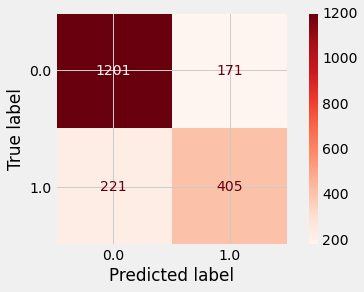

In [96]:
y_pred_test = lr.predict(X_test_final)

print('Precision - Test Set   : ', precision_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr, X_test_final, y_test, cmap='Reds'))

Selanjutnya dilakukan pengecekan performa Model Logistic Regression Test Set dan di dapatkan nilai precision sebesar 70% dan Precision 

## Hyperparamater Tunning

Hyperparamater menggunakan Grid Search CV dan paramater yang di berikan untuk hyperparamater tunning menggunakan GridsearchCV pada Logistic Regression adalah penalty = ['l1', 'l2', 'elasticnet', 'none'], C = [100, 10, 1.0, 0.1, 0.01], solver = ['lbfgs','newton-cg','liblinear','sag','saga'], max_iter= [100, 325, 550, 775, 1000], multi_class = ['auto', 'ovr', 'multinomial']

Untuk default paramater Logistic Regression adalah :

- Penalty = l2
- C = 1.0
- solver = lbfgs
- Max_iter = 100
- multi_class = auto

In [97]:
penalty = ['l1', 'l2', 'elasticnet', 'none']
C = [100, 10, 1.0, 0.1, 0.01]
solver = ['lbfgs','newton-cg','liblinear','sag','saga']
multi_class = ['auto', 'ovr', 'multinomial']
max_iter = [100, 1000,2500, 5000]
gridcv = {'penalty':penalty,
               'C':C,
               'multi_class':multi_class,
               'max_iter':max_iter
               }
gridcv

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'C': [100, 10, 1.0, 0.1, 0.01],
 'multi_class': ['auto', 'ovr', 'multinomial'],
 'max_iter': [100, 1000, 2500, 5000]}

Masukan Paramater yang akan digunakan

In [98]:
lr_gridcv = GridSearchCV(estimator=LogisticRegression(),
                         param_grid=gridcv,
                         cv=10,
                         n_jobs=-1,
                         verbose=2)

lr_gridcv.fit(X_train_final, y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'max_iter': [100, 1000, 2500, 5000],
                         'multi_class': ['auto', 'ovr', 'multinomial'],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             verbose=2)

Fit Grid Search

In [99]:
lr_gridcv.best_params_

{'C': 0.01, 'max_iter': 100, 'multi_class': 'multinomial', 'penalty': 'l2'}

Untuk paramater terbaik hasil gridsearch adalah {'C': 0.01, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2'}

In [100]:
lr_gridcv = lr_gridcv.best_estimator_

Mendapatkan best estimator

Accuracy - Train Set   :  0.7193877551020408 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.87      4139
         1.0       0.72      0.57      0.64      1721

    accuracy                           0.81      5860
   macro avg       0.78      0.74      0.75      5860
weighted avg       0.80      0.81      0.80      5860
 

Confusion Matrix      : 
Accuracy - Test Set   :  0.6985559566787004 

Classification Report : 
               precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1372
         1.0       0.70      0.62      0.66       626

    accuracy                           0.80      1998
   macro avg       0.77      0.75      0.76      1998
weighted avg       0.79      0.80      0.79      1998
 

Confusion Matrix      : 


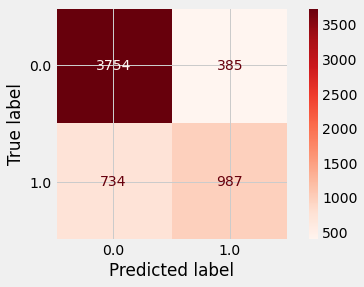

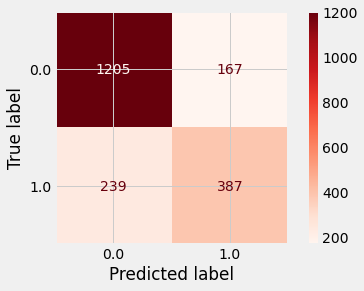

In [101]:
# Check Performance Model against Train-Set
y_pred_train = lr_gridcv.predict(X_train_final)

print('Accuracy - Train Set   : ',precision_score(y_train, y_pred_train), '\n'),
print('Classification Report : \n', classification_report(y_train, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr_gridcv, X_train_final, y_train, cmap='Reds'))

# Check Performance Model against Test-Set
y_pred_test = lr_gridcv.predict(X_test_final)

print('Accuracy - Test Set   : ', precision_score(y_test, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(lr_gridcv, X_test_final, y_test, cmap='Reds'))

Setelah dilakukan hyperparamater tunning nilai precision tidak terjadi peningkatan malah turun dari  0.703125 ke 0.698555 yang mana masih bisa dikatakan 70%. Hal ini mungkin dikarenakan penentuan paramater yang kurang tepat, dibutuhkan explorasi lagi untuk mencari paramater yang lebih baik, dikarenakan waktu yang sedikit untuk saat ini cukup sampai 70% saja.

## Pipeline

In [102]:
num_pipeline = make_pipeline(StandardScaler())

cat_pipeline = make_pipeline(OneHotEncoder())


data_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

# final pipeline
final_pipeline = make_pipeline(data_pipeline, GridSearchCV(estimator=LogisticRegression(),
                         param_grid=gridcv,
                         cv=5,
                         n_jobs=-1,
                         verbose=2))

Masukan yang tools yang digunakan model seperti Standard Scaller, One Hot Encoder dan Grid Search

In [103]:
final_pipeline.fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipe_num',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['EDUCATION', 'INCOME',
                                                   'CREDIT_SCORE',
                                                   'ANNUAL_MILEAGE',
                                                   'SPEEDING_VIOLATIONS',
                                                   'PAST_ACCIDENTS']),
                                                 ('pipe_cat',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['DRIVING_EXPERIENCE',
                                                   'VEHICLE_OWNERS

Fit model menggunakan Pipeline

In [104]:
final_pipeline.fit(X_train, y_train)

y_pred = final_pipeline.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86      1372
         1.0       0.70      0.62      0.66       626

    accuracy                           0.80      1998
   macro avg       0.77      0.75      0.76      1998
weighted avg       0.79      0.80      0.79      1998



Run model Pipeline didapatkan precision 70% sama seperti model

In [105]:
with open('asuransi.pkl', 'wb') as f:
    pickle.dump(final_pipeline, f)

Save model kedalam file extention pickle yang nantinya akan berguna pada saat deployment

# 9. Model Inference

In [106]:
data_inf

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,185905,Middle Age,male,majority,Amateur,1,0,0.448060,Yes,before 2015,No,Yes,10238,15000.0,sedan,1,0,1,0.0
1,363870,Very Old,female,majority,Expert,1,3,0.797687,Yes,after 2015,Yes,Yes,10238,9000.0,sedan,4,1,4,0.0
2,372474,Old,female,majority,Advanced,1,3,0.432835,Yes,after 2015,Yes,No,10238,13000.0,sedan,1,0,0,0.0
3,868371,Very Old,male,majority,Expert,1,3,0.582587,Yes,after 2015,Yes,Yes,10238,11000.0,sedan,10,0,1,0.0
4,714609,Middle Age,male,majority,Amateur,1,0,0.374125,No,before 2015,No,No,10238,13000.0,sedan,1,0,3,1.0
5,974307,Young,male,majority,Newbie,0,0,0.528718,No,before 2015,No,Yes,10238,10000.0,sedan,0,0,0,1.0
6,635692,Middle Age,female,majority,Amateur,1,2,0.593888,Yes,before 2015,No,Yes,10238,14000.0,sedan,1,0,0,0.0
7,825706,Young,male,majority,Newbie,1,0,0.294914,No,before 2015,No,No,10238,15000.0,sedan,0,0,0,1.0
8,655303,Old,male,majority,Amateur,0,1,0.308616,No,before 2015,No,Yes,92101,12000.0,sedan,2,1,1,1.0
9,105372,Middle Age,female,minority,Amateur,0,1,0.503950,No,before 2015,No,Yes,10238,14000.0,sedan,1,0,0,0.0


In [107]:
data_inf.drop('ID', axis=1, inplace=True)
data_inf.drop('POSTAL_CODE', axis=1, inplace=True)
data_inf.drop('RACE', axis=1, inplace=True)
data_inf.drop('GENDER', axis=1, inplace=True)
data_inf.drop('VEHICLE_YEAR', axis=1, inplace=True)
data_inf.drop('VEHICLE_TYPE', axis=1, inplace=True)
data_inf.drop('DUIS', axis=1, inplace=True)
data_inf.drop('AGE', axis=1, inplace=True)
data_inf.drop('OUTCOME', axis=1, inplace=True)

Melakukan Drop pada data inference yang disamakan dengan drop pada dataset asli

In [108]:
data_inf

,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS
0,Amateur,1,0,0.448060,Yes,No,Yes,15000.0,1,1
1,Expert,1,3,0.797687,Yes,Yes,Yes,9000.0,4,4
2,Advanced,1,3,0.432835,Yes,Yes,No,13000.0,1,0
3,Expert,1,3,0.582587,Yes,Yes,Yes,11000.0,10,1
4,Amateur,1,0,0.374125,No,No,No,13000.0,1,3
5,Newbie,0,0,0.528718,No,No,Yes,10000.0,0,0
6,Amateur,1,2,0.593888,Yes,No,Yes,14000.0,1,0
7,Newbie,1,0,0.294914,No,No,No,15000.0,0,0
8,Amateur,0,1,0.308616,No,No,Yes,12000.0,2,1
9,Amateur,0,1,0.503950,No,No,Yes,14000.0,1,0


In [109]:
data_inf_num = data_inf[num_columns]
data_inf_cat = data_inf[cat_columns]

Memisahkan Kolom Numerik dan Kategorikal data inference

In [110]:
data_inf_num_2 = data_inf_num.drop(columns=['EDUCATION', 'INCOME'])
data_inf_num_2

,CREDIT_SCORE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS
0,0.448060,15000.0,1,1
1,0.797687,9000.0,4,4
2,0.432835,13000.0,1,0
3,0.582587,11000.0,10,1
4,0.374125,13000.0,1,3
5,0.528718,10000.0,0,0
6,0.593888,14000.0,1,0
7,0.294914,15000.0,0,0
8,0.308616,12000.0,2,1
9,0.503950,14000.0,1,0


Drop kolom kategorikal ordinal dari numerik

In [111]:
data_inf_num_3 = data_inf_num[['EDUCATION', 'INCOME']]

In [112]:
data_inf_num_3

,EDUCATION,INCOME
0,1,0
1,1,3
2,1,3
3,1,3
4,1,0
5,0,0
6,1,2
7,1,0
8,0,1
9,0,1


Memisahkan column categorical berbentuk numeric

In [113]:
data_inf_num_scaled = scaler.transform(data_inf_num_2)
data_inf_cat_enc = encoder.transform(data_inf_cat).toarray()
data_inf_num_scaled.shape

(10, 4)

Scaling dan encoding data inference menggunakan Standard Scaller dan One Hot Encoder

In [114]:
data_inf_num_final = np.concatenate([data_inf_num_scaled, data_inf_num_3], axis=1)
data_inf_num_final

array([[-7.97330454e-01,  1.81726418e+00, -1.86291262e-01,
         4.23431021e-02,  1.00000000e+00,  0.00000000e+00],
       [ 2.65885374e+00, -1.34218746e+00,  1.63517726e+00,
         2.31183010e+00,  1.00000000e+00,  3.00000000e+00],
       [-9.47836165e-01,  7.64113631e-01, -1.86291262e-01,
        -7.14152563e-01,  1.00000000e+00,  3.00000000e+00],
       [ 5.32516415e-01, -2.89036916e-01,  5.27811429e+00,
         4.23431021e-02,  1.00000000e+00,  3.00000000e+00],
       [-1.52819908e+00,  7.64113631e-01, -1.86291262e-01,
         1.55533443e+00,  1.00000000e+00,  0.00000000e+00],
       [ 5.48746171e-15, -8.15612189e-01, -7.93447435e-01,
        -7.14152563e-01,  0.00000000e+00,  0.00000000e+00],
       [ 6.44227199e-01,  1.29068890e+00, -1.86291262e-01,
        -7.14152563e-01,  1.00000000e+00,  2.00000000e+00],
       [-2.31122803e+00,  1.81726418e+00, -7.93447435e-01,
        -7.14152563e-01,  1.00000000e+00,  0.00000000e+00],
       [-2.17577728e+00,  2.37538358e-01,  4.208

Menggabungkan kembali column numeric dan column categorical berbentuk numeric

In [115]:
data_inf_final = np.concatenate([data_inf_num_final, data_inf_cat_enc], axis=1)
data_inf_final

array([[-7.97330454e-01,  1.81726418e+00, -1.86291262e-01,
         4.23431021e-02,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 2.65885374e+00, -1.34218746e+00,  1.63517726e+00,
         2.31183010e+00,  1.00000000e+00,  3.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [-9.47836165e-01,  7.64113631e-01, -1.86291262e-01,
        -7.14152563e-01,  1.00000000e+00,  3.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         0.00000000e+00],
       [ 5.32516415e-01, -2.89036916e

Menggabungkan Column Numeric dan Categorical

In [116]:
y_pred_inf = lr_gridcv.predict(data_inf_final)
y_pred_inf_df = pd.DataFrame(y_pred_inf, columns=['Loan - Prediction'])
y_pred_inf_df

,Loan - Prediction
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,1.0
6,0.0
7,1.0
8,0.0
9,0.0


Mendapatkan hasil prediksi data inference

In [117]:
pd.concat([data_inf, y_pred_inf_df], axis=1)

,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,PAST_ACCIDENTS,Loan - Prediction
0,Amateur,1,0,0.448060,Yes,No,Yes,15000.0,1,1,0.0
1,Expert,1,3,0.797687,Yes,Yes,Yes,9000.0,4,4,0.0
2,Advanced,1,3,0.432835,Yes,Yes,No,13000.0,1,0,0.0
3,Expert,1,3,0.582587,Yes,Yes,Yes,11000.0,10,1,0.0
4,Amateur,1,0,0.374125,No,No,No,13000.0,1,3,0.0
5,Newbie,0,0,0.528718,No,No,Yes,10000.0,0,0,1.0
6,Amateur,1,2,0.593888,Yes,No,Yes,14000.0,1,0,0.0
7,Newbie,1,0,0.294914,No,No,No,15000.0,0,0,1.0
8,Amateur,0,1,0.308616,No,No,Yes,12000.0,2,1,0.0
9,Amateur,0,1,0.503950,No,No,Yes,14000.0,1,0,0.0


Menggabungkan hasil prediksi dan dataframe inference

# 10. Kesimpulan

## Hasil EDA
1. Gender tidak berpengaruh terhadap nasabah akan klaim pinjaman atau tidak, dikarenakan datanya hampir sama.
2. Race tidak berpengaruh dikarenakan datanya sangat imbalance.
3. Pengalaman berkendara disini pemula paling banyak klaim pinjaman asuransi, ini bisa jadi disebabkan karena pemula banyak terjadi kecelakaan dalam berkendara yang membuat kendaraan mereka rusak sehingga mengklaim pinjaman mereka.
4. Kelas Kemiskinan lebih mungkin untuk mengajukan pinjaman, sedangkan kelas yang lebih tinggi adalah yang paling kecil kemungkinannya untuk mengajukan pinjaman.
5. Pendidikan cukup berpengaruh terhadap target karena data mayoritasnya university sedangkan yang paling banyak klaim pinjaman adalah high school.
6. kelas Kemiskinan lebih mungkin untuk mengajukan pinjaman, sedangkan kelas yang lebih tinggi adalah yang paling kecil kemungkinannya untuk mengajukan pinjaman.
7. Nasabah yang tidak memiliki kendaraan lebih banyak yang claim pinjaman, padahal data mayoritasnya adalah yang memiliki.
8. Status Pernikahan berkorelasi terhadap target karena yg single lebih banyak claim padahal data mayoritasnya yang menikah.

## Model Analysis
1. Untuk metrics penilainya menggunakan Precision dikarenakan False Positive yang paling berbahaya dikarenakan model memprediksi customer mengajukan pinjaman padahal kenyataanya tidak, hanya membuang-buang waktu tim marketing. Untuk meminimalkan False Positive.
2. Dari 4 model yang di coba yaitu Logistic Regression, DecisionTree Classifier, RandomForestClassifier dan XGBClassifier yang terbaik berdasarkan cek Cross validation adalah Logistic Regression.
3. Dari hasil pengecekan Cross Validation diatas didapatkan nilai tertinggi pada model Logistic Regression dengan nilai precision mean cross validation sebesar 0.6980097387625079 dan standar deviasi  0.016512730702359167  lebih besar sedikit dibandingkan dengan Random Forest dengan mean cross validation sebesar 0.6643349266220151, maka untuk proses hyperparamater tunning akan menggunakan model Logistic Regression.
4. Untuk Hyperparamater Tunning hanya menggunakan model terbaik saja yaitu Logistic Regression dikarenakan memiliki nilai terbaik dibandingkan model lain.
5. Paramater yang di berikan untuk hyperparamater tunning menggunakan GridsearchCV pada Logistic Regression adalah penalty = ['l1', 'l2', 'elasticnet', 'none'], C = [100, 10, 1.0, 0.1, 0.01], max_iter= [100, 325, 550, 775, 1000], multi_class = ['auto', 'ovr', 'multinomial'].
6. Untuk paramater terbaik hasil gridsearch adalah {'C': 0.01, 'max_iter': 100, 'multi_class': 'auto', 'penalty': 'l2'}.
7. Setelah dilakukan hyperparamater tunning nilai precision tidak terjadi peningkatan malah turun dari  0.703125 ke 0.698555 yang mana masih bisa dikatakan 70%. Hal ini mungkin dikarenakan penentuan paramater yang kurang tepat, dibutuhkan explorasi lagi untuk mencari paramater yang lebih baik, dikarenakan waktu yang sedikit untuk saat ini cukup sampai 70% saja.

## Bisnis Analisis dan Future Imrpovements
1. Dikarenakan ini perusahaan asuransi mobil harusnya yang bisa jadi nasabah hanya yang memiliki kendaraan saja.
2. Lebih banyak promosi kepada usia muda dan usia mengengah, karena mereka yang paling banyak melakukan pinjaman, dibandingkan usia tua yang memiliki data terbanyak tetapi mereka mayoritas tidak melakukan pinjaman.
3. Perbanyak promosi di showroom mobil karena banyak nasabah yang baru bisa mengendarai mobil yang melakukan pinjaman.
4. Jangan fokus kepada orang dengan pendapatan tinggi, karena untuk kelas bawah justru paling banyak yang melakukan pinjaman dibandingkan kelas atas yang datanya sangat imbalance yang meminjam dan tidak.
5. Hyperparamater Tunning yang digunakan kurang stabil untuk selanjutnya bisa memilih paramater lain dan memperbanyak paramater supaya mendapatkan Hyperparamater Tunnig yang lebih stabil.
6. Model yang dipilih tidak tepat dikarenakan hanya mendapatkan nilai precision maksimal 70%, selanjutnya bisa memilih model yang lebih powerfull seperti model boosting atau SVC yang perhitunganya lebih kompleks.